## KNN Classifier

**KNN Classifier** is one of the most basic classifier in ML. It's a non-parametric method, means there are no parameters to be estimated. **KNN** remembers the whole training set and uses that to make prediction on the test data. **KNN** suffers from curse of dimensionality, hence usually **LDA** or **PCA** is performed as a pre step to **KNN** to reduce dimensions.

In [2]:
#Lets use Sklearn to implement KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, plotDecisionSurface=True):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if plotDecisionSurface:
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [4]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [15 15 15]
Labels counts in y_train: [35 35 35]


In [5]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [6]:
#Lets apply KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
y_gnb_train_pred = neigh.fit(X_train_std, y_train).predict(X_train_std)
y_gnb_test_pred = neigh.predict(X_test_std)

Text(0.5, 1.0, 'KNN')

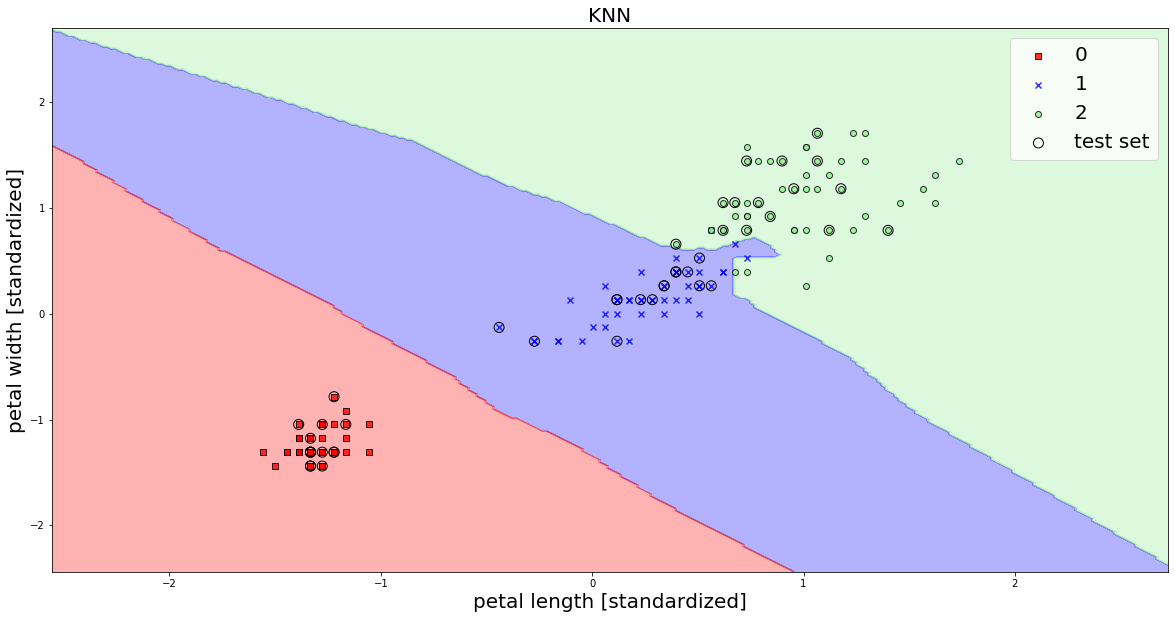

In [7]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=neigh, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('KNN', fontsize=20)

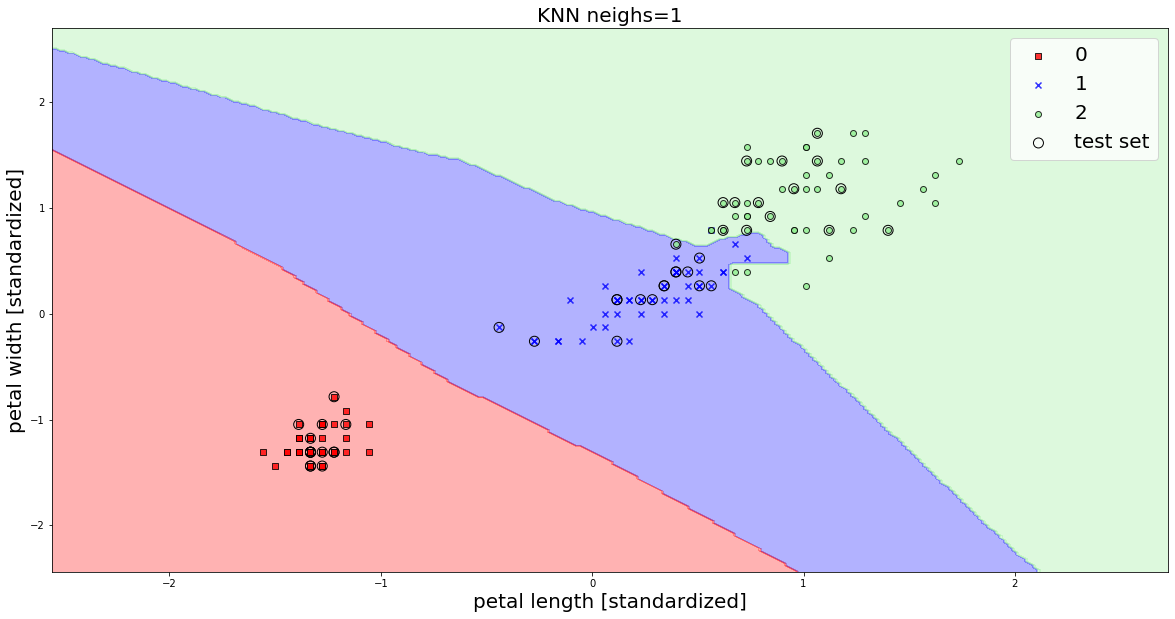

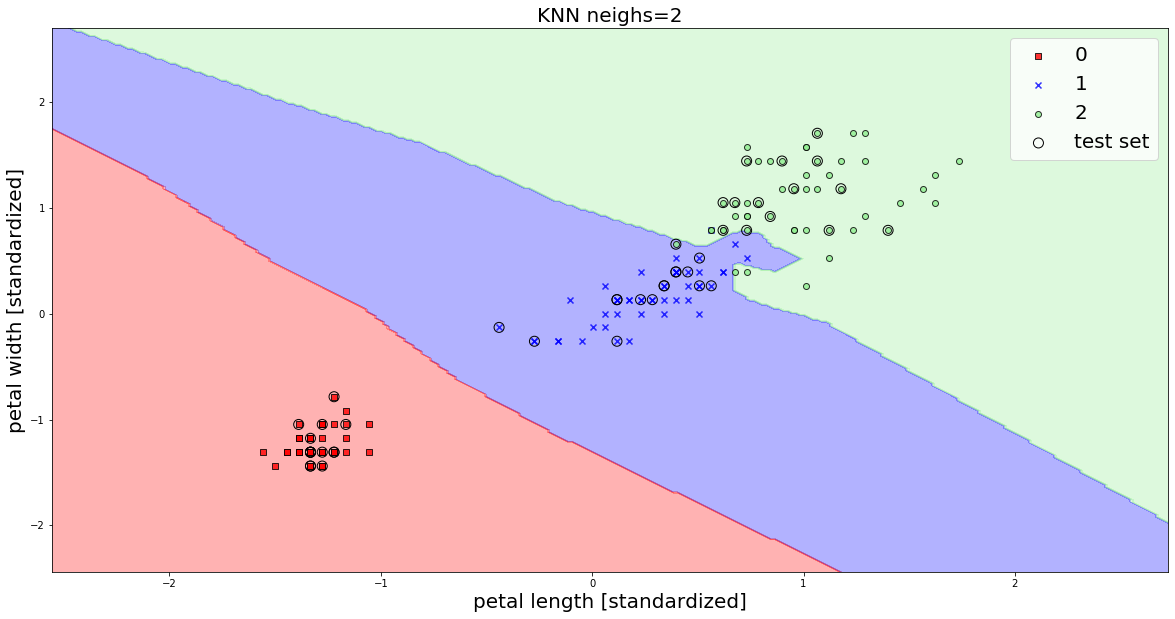

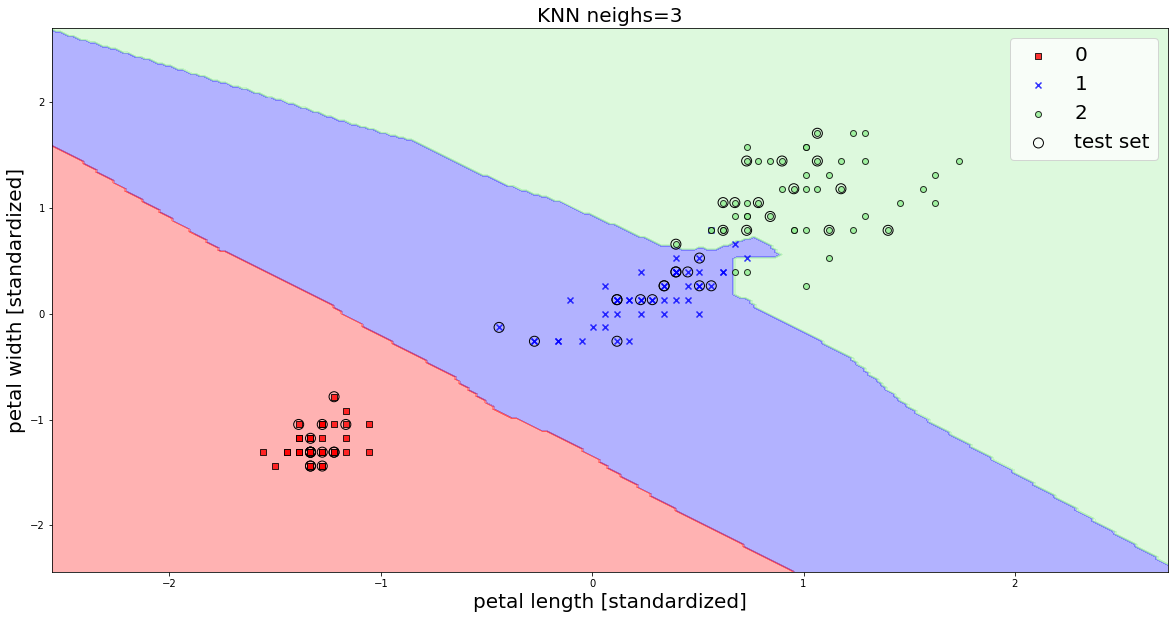

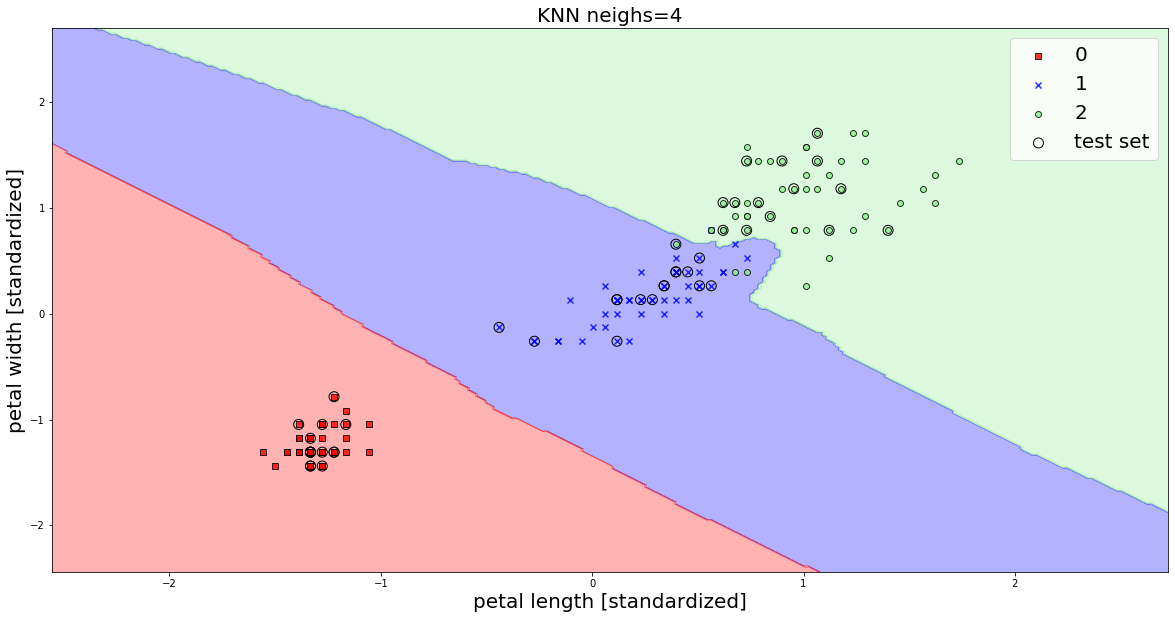

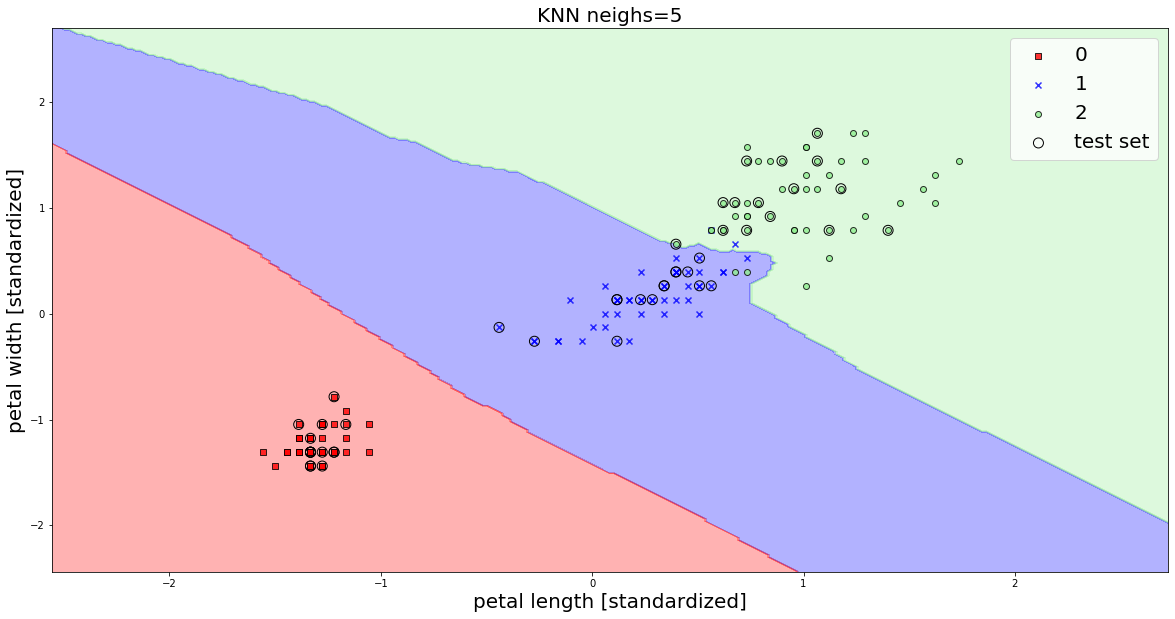

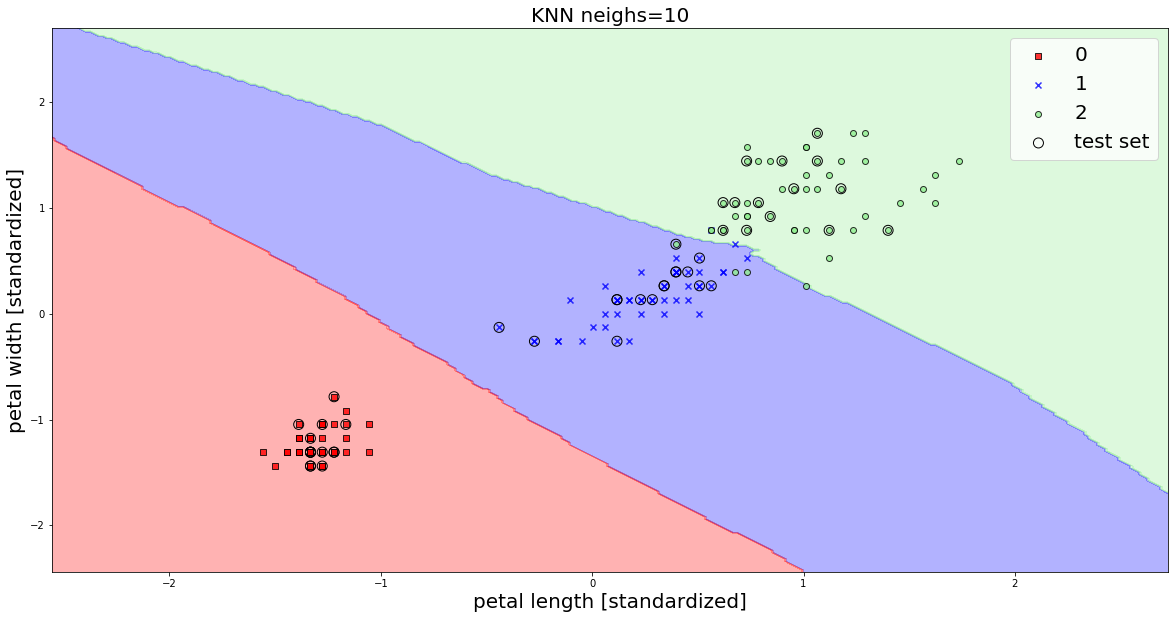

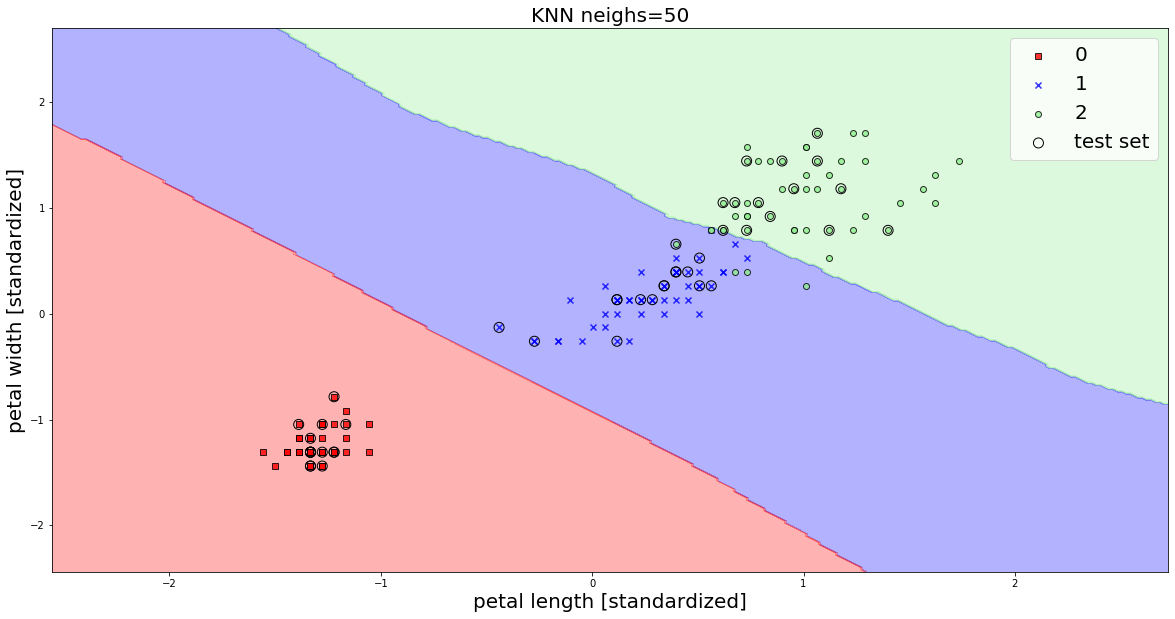

In [14]:
#Lets see how the decision boundary changes as we change number of neighbours
neighbours = [1, 2, 3, 4, 5, 10, 50]
for n in neighbours:
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train_std, y_train)
    plt.figure(figsize=(20,10))
    plot_decision_regions(X_combined_std, y_combined, classifier=neigh, test_idx=range(105,150))
    plt.xlabel('petal length [standardized]', fontsize=20)
    plt.ylabel('petal width [standardized]', fontsize=20)
    plt.legend(fontsize=20)
    plt.axis(fontsize=20)
    plt.title(f'KNN neighs={n}', fontsize=20)

You can see from above plots that decision boundary becomes smoother as we increase number of neighbours.

#### Lets implement KNN classifier. 

**KNN** algorithm is very simple.
1. Choose the number of nearest neighbours and a distance metric.
2. Find the k nearest neighbours of the training data we want to classify.
3. Assign the label by majority vote.

Below we will implement a very basic version of **KNN** algorithm, there are more efficient implementations using k-d trees. 

In [99]:
from scipy import stats

class KNN():
    
    def __init__(self, k=3):
        self.k_ = k
        
    def fit(self, X,y):
        self.X_ = X
        self.y_ = y
    
    def distance(self, x1,x2):
        """
            distance of x2 from every point in vector x1
        """
        return np.sum(np.square(x1-x2),axis=1)
    
    def predict(self, X):
        ypred = np.zeros(X.shape[0])
        for ndx, xi in enumerate(X):
            #Find distance of xi from every element in self.X
            dist = self.distance(self.X_, xi)
            #Sort the distance and get the k smallerst 
            smallest_k = np.argsort(dist,kind='stable')[:self.k_]
            ypred[ndx] = stats.mode(self.y_[smallest_k]).mode[0]
        return ypred
            
    

In [100]:
myNeigh = KNN(k=3)
myNeigh.fit(X_train_std, y_train)
y_gnb_test_pred = myNeigh.predict(X_test_std)

Text(0.5, 1.0, 'KNN')

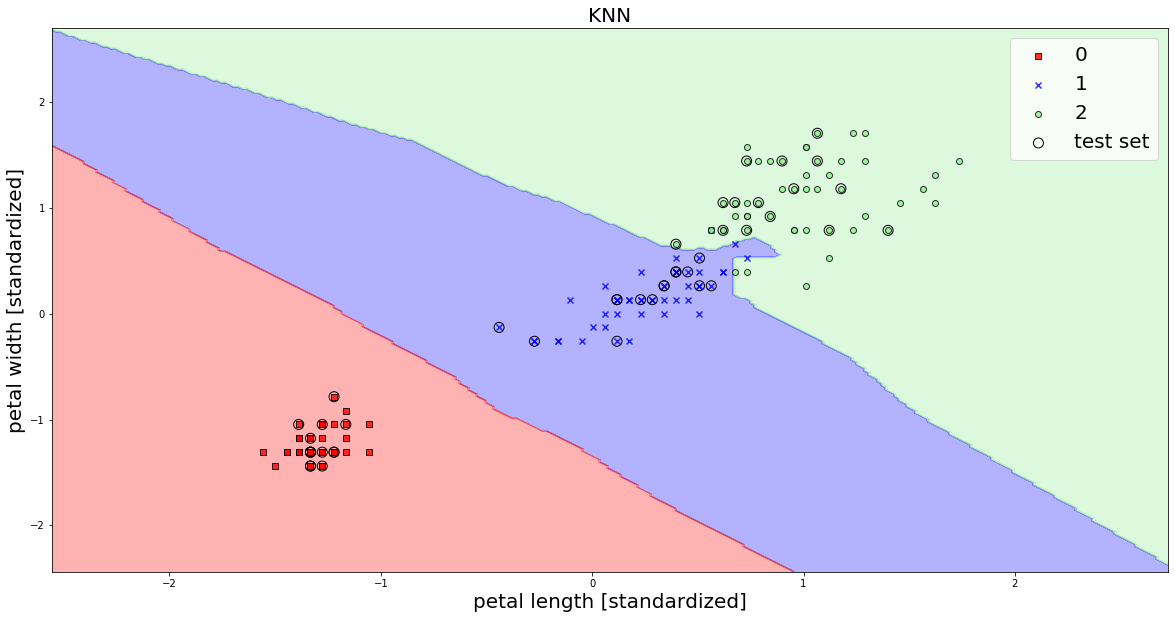

In [101]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=myNeigh, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('KNN', fontsize=20)

#### Yay!! MyKNN matches with decision boundary from sklearn